In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [33]:
subjects = []
subjects.append(pd.read_csv('data/Roshak_responses.csv'))
subjects.append(pd.read_csv('data/Zakiye_responses.csv'))
subjects.append(pd.read_csv('data/Armandillo Khorshidello_responses.csv'))
subjects.append(pd.read_csv('data/Parsa_responses.csv'))

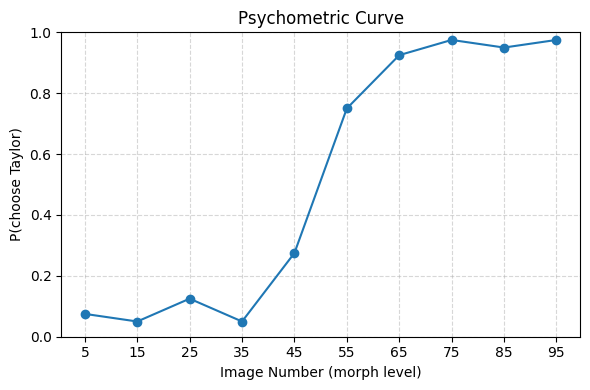

In [23]:
df = pd.read_csv('data/Roshak_responses.csv')
p_taylor = df.groupby('image_number')['chosen'] \
             .apply(lambda choices: (choices == 'taylor').sum() / len(choices))

# 3) Prepare x and y in sorted order (5,15,...,95)
x = list(range(5, 100, 10))
y = [p_taylor.get(i, 0) for i in x]  # default to 0 if a level is missing

# 4) Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Image Number (morph level)')
plt.ylabel('P(choose Taylor)')
plt.title('Psychometric Curve')
plt.xticks(x)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
df.head()

,block,image_number,chosen
0,1,35,alex
1,1,45,taylor
2,1,35,taylor
3,1,55,taylor
4,1,45,taylor


In [45]:
def compute_jnd(x0, k):
    return 2 * np.log(3) / k


def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-(x - x0) / k))

def psycho_fit(data):
    prob = data.groupby(['image_number', 'chosen']).size().unstack(fill_value=0)
    prob['probability'] = data.get('taylor', 0) / (data.get('taylor', 0) + data.get('alex', 0))

    x_data = prob.index.values
    y_data = prob['probability'].values
    starter_guess = [1.0, 1.0]
    params, _ = curve_fit(sigmoid, x_data, y_data, p0=starter_guess, maxfev=900)

In [46]:
jnd_df = pd.DataFrame({'block': range(1, 5)})

subject number 1, block 1, app_09, jnd: 0.79
subject number 1, block 2, app_19, jnd: 0.61
subject number 1, block 3, sha_09, jnd: 0.44
subject number 1, block 4, sha_19, jnd: 0.11


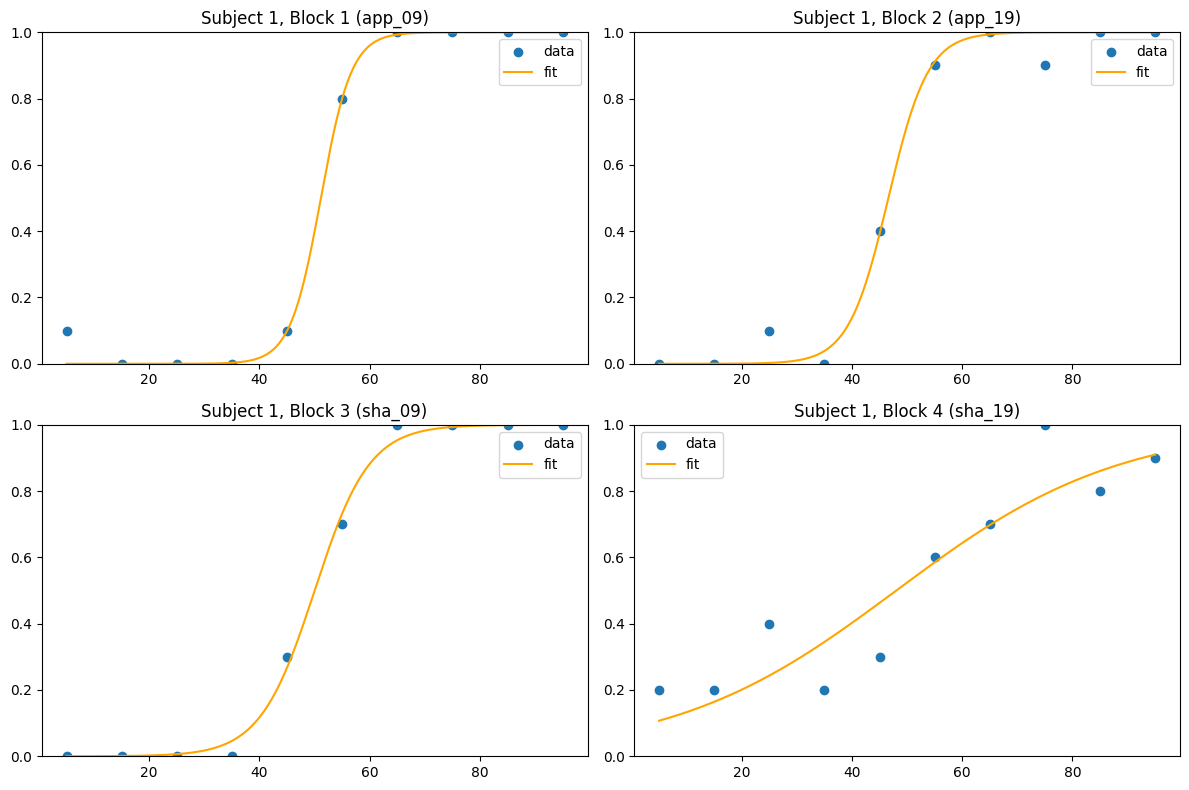

subject number 2, block 1, app_09, jnd: 2.91
subject number 2, block 2, app_19, jnd: 0.29
subject number 2, block 3, sha_09, jnd: 0.50
subject number 2, block 4, sha_19, jnd: 0.76


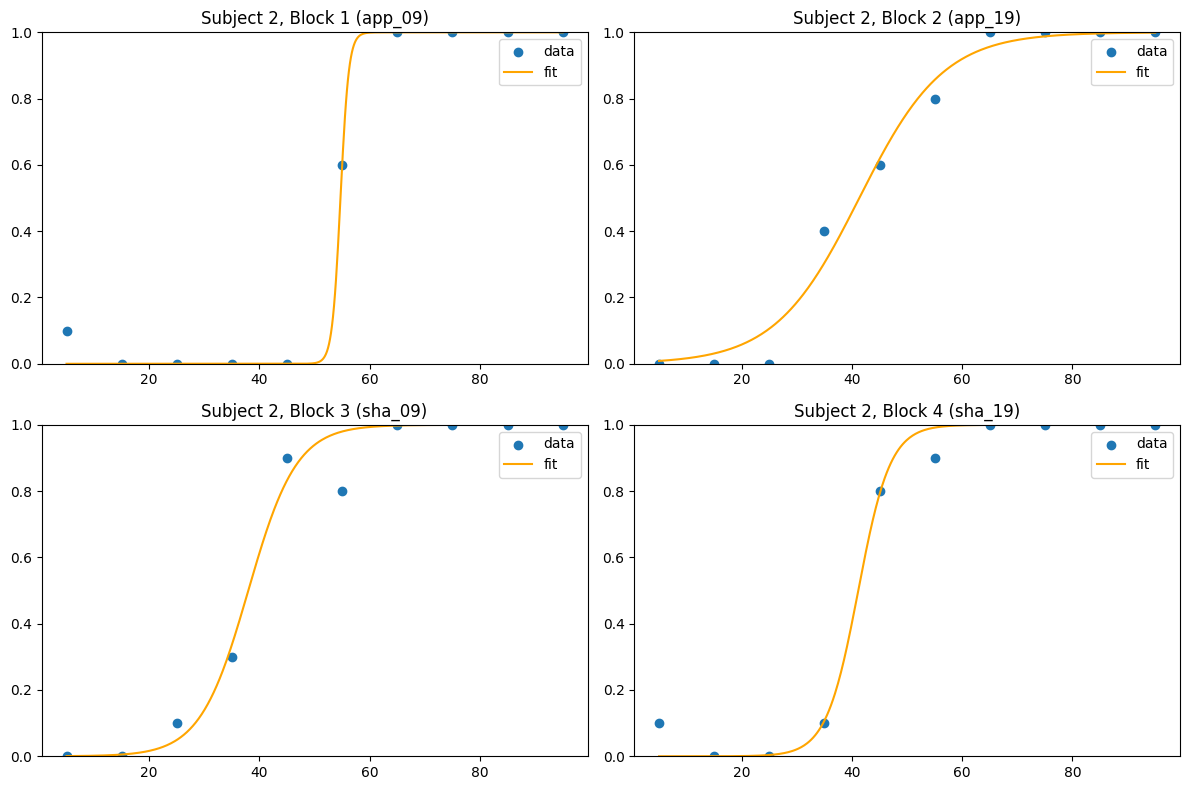

subject number 3, block 1, app_09, jnd: 0.76
subject number 3, block 2, app_19, jnd: 0.36
subject number 3, block 3, sha_09, jnd: 0.25
subject number 3, block 4, sha_19, jnd: 0.58


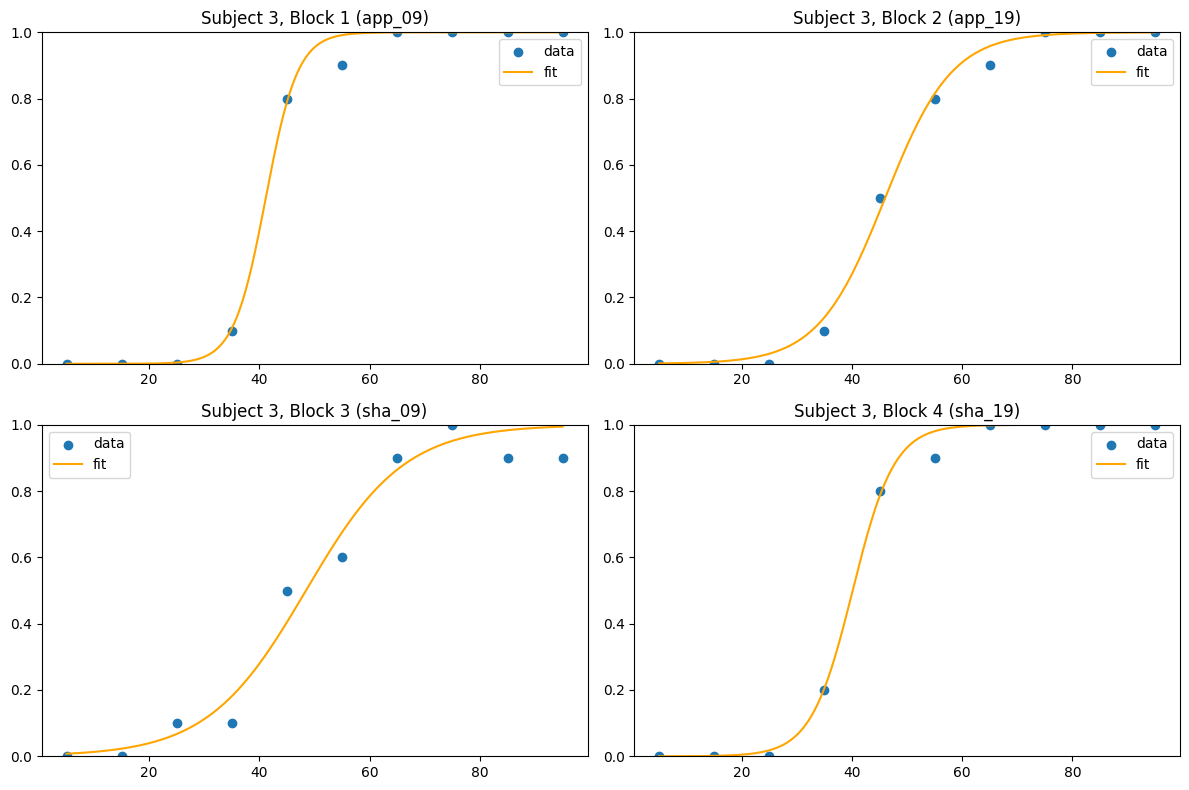

subject number 4, block 1, app_09, jnd: 0.47
subject number 4, block 2, app_19, jnd: 2.81
subject number 4, block 3, sha_09, jnd: 0.57
subject number 4, block 4, sha_19, jnd: 0.27


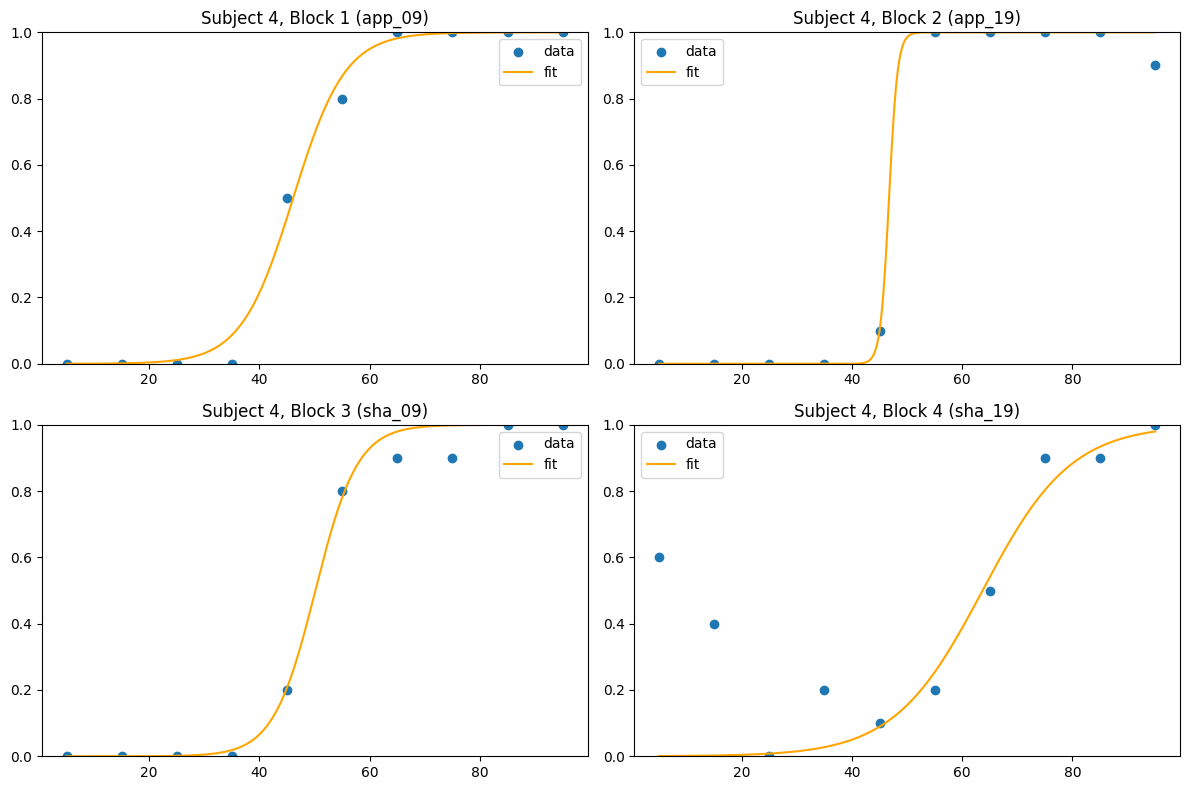

In [ ]:
block_labels = {
    1: "app_09",
    2: "app_19",
    3: "sha_09",
    4: "sha_19"
}

for idx, subject in enumerate(subjects):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()
    for block_num in range(1, 5):
        block_data = subject[subject['block'] == block_num]
        grouped = block_data.groupby('image_number')['chosen'].value_counts().unstack(fill_value=0)
        image_numbers = grouped.index.values
        taylor_counts = grouped.get('taylor', pd.Series(0, index=image_numbers))
        total_counts = grouped.sum(axis=1)
        probabilities = taylor_counts / total_counts
        x_data = image_numbers
        y_data = probabilities.values
        popt, _ = curve_fit(sigmoid, x_data, y_data, bounds=([0, 0.1], [100, 100]))
        x_fit = np.linspace(5, 95, 500)
        y_fit = sigmoid(x_fit, *popt)
        axs[block_num - 1].scatter(x_data, y_data, label='data')
        axs[block_num - 1].plot(x_fit, y_fit, color='orange', label='fit')

        block_label = block_labels.get(block_num, "")
        axs[block_num - 1].set_title(f'Subject {idx+1}, Block {block_num} ({block_label})')
        axs[block_num - 1].set_ylim(0, 1)
        axs[block_num - 1].legend()
        jnd = compute_jnd(*popt)
        print(f"subject number {idx+1}, block {block_num}, {block_label}, jnd: {jnd:.2f}")
    plt.tight_layout()
    plt.show()
